In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('boston.csv')

def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i - avg)/(maxi - mini) for i in x]
    
    return new

df = data.copy()
df = df.apply(normal, axis=0)
df = df.drop('ID', axis=1)

Xd = df.drop(columns=['medv'])
Xd.insert(0, 'X0', 1) # bias 

# numpy array format
y = df.medv.values
y = np.expand_dims(y, axis=1)
X = Xd.values

# sample size
m = len(df.index)
n = X.shape[1]
theta = np.random.randn(n, 1)

In [2]:
def mini_batch_gd(X, y, theta, learning_rate = 0.01, epochs = 200, minibatch_size = 64):
    losses = []
    
    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, minibatch_size):
            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            
            output = np.dot(xi, theta)
            
            loss = 1/2 * (output - yi)**2 
            
            loss_grd = (output - yi) 
            gradients = np.dot(xi.T, loss_grd)
            
            theta = theta - learning_rate*gradients
            
            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)
            
    return theta, losses

In [3]:
theta, losses = mini_batch_gd(X, y, theta)

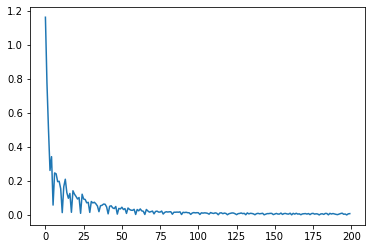

In [4]:
plt.plot(losses[:200])